In [1]:
import pandas, numpy

import scipy, scipy.stats

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 8)})

# 0. user-defined variables

In [2]:
data_file ='/home/adrian/gd15/hi/research/huvec/data/fluxes_targeted/csv/13C_OSK_EC45.csv'

# 1. read data

In [3]:
df = pandas.read_csv(data_file)
df.drop(0, inplace=True)
df.iloc[:, 7:] = df.iloc[:, 7:].astype('float')
df.head()
df.dtypes

Sample ID(MS)                object
Sample ID Rosa               object
Experiment                   object
13label                      object
Treatment                   float64
Timepoint (h)               float64
Cell numbers                float64
Glutamate_neg               float64
Citrate_neg                 float64
Malate_neg                  float64
Glutamine_neg               float64
GSH_neg                     float64
NAD_NEG_540                 float64
UDPacetylGlucosamine_neg    float64
Inosine                     float64
Adenosine in ADP            float64
UDPglucose                  float64
AMP                         float64
ADP                         float64
CMP                         float64
dTMP                        float64
phosphocholine              float64
phosphoryletanolamine       float64
AcetylCarnitine             float64
LPC160                      float64
Glycerophosphocholine       float64
GSSG                        float64
Adenosine                   

In [4]:
pandas.set_option("display.max_rows", 200, "display.max_columns", 20)
print(df)

   Sample ID(MS) Sample ID Rosa Experiment          13label  Treatment  \
1        EGM-6-1        EGM-6-1       EC45              egm        0.0   
2        EGM-6-2        EGM-6-2       EC45              egm        0.0   
3        EGM-6-3        EGM-6-3       EC45              egm        0.0   
4      F-13C-6-1      F-13C-6-1       EC45  1,2-13C Glucose        0.0   
5      F-13C-6-2      F-13C-6-2       EC45  1,2-13C Glucose        0.0   
6      F-13C-6-3      F-13C-6-3       EC45  1,2-13C Glucose        0.0   
7    G-0.5uM-6-1    G-0.5uM-6-1       EC45  1,2-13C Glucose        0.5   
8    G-0.5uM-6-2    G-0.5uM-6-2       EC45  1,2-13C Glucose        0.5   
9    G-0.5uM-6-3    G-0.5uM-6-3       EC45  1,2-13C Glucose        0.5   
10     H-5uM-6-1      H-5uM-6-1       EC45  1,2-13C Glucose        5.0   
11     H-5uM-6-2      H-5uM-6-2       EC45  1,2-13C Glucose        5.0   
12     H-5uM-6-3      H-5uM-6-3       EC45  1,2-13C Glucose        5.0   
13      EGM-24-1       EGM-24-1       

# 3. plot

Glutamate_neg
correlations
[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0291, 0.0274, 0.0285, 0.0296, 0.0259, 0.0278, 0.0286, 0.0292, 0.0258]
Spearman 0.0 1.0
Pearson -0.14531915052485672 0.7091186304827345
linear regression -0.14531915052485667 0.709118630482735

[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0419, 0.0444, 0.0481, 0.0469, 0.0468, 0.0492, 0.046, 0.048, 0.0445]
Spearman 0.15811388300841894 0.6845283355605285
Pearson 0.26026631701100067 0.49881461775741043
linear regression 0.2602663170110006 0.49881461775741043
boxplots
[0.0291 0.0274 0.0285] [0.0296 0.0259 0.0278] 5.0 1.0
[0.0291 0.0274 0.0285] [0.0286 0.0292 0.0258] 4.0 1.0
[0.0419 0.0444 0.0481] [0.0469 0.0468 0.0492] 2.0 0.4
[0.0419 0.0444 0.0481] [0.046  0.048  0.0445] 3.0 0.7


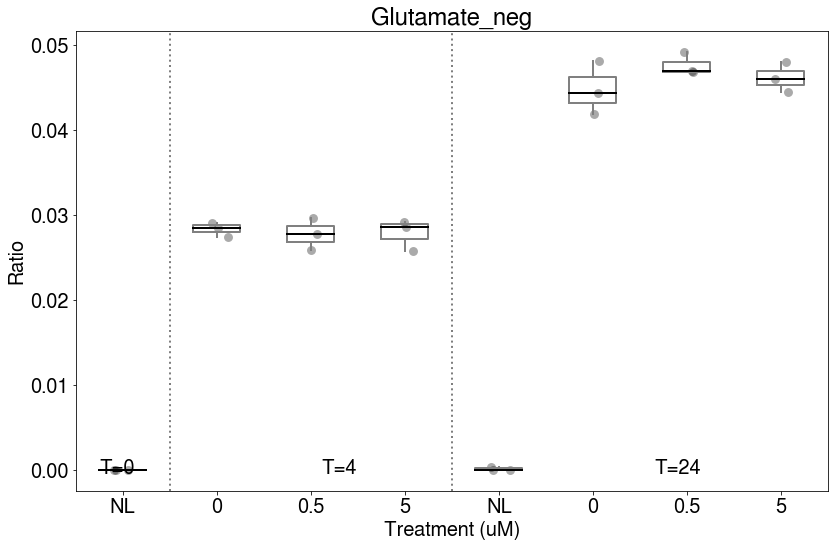

Citrate_neg
correlations
[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0164, 0.0172, 0.0159, 0.0434, 0.0227, 0.0158, 0.0263, 0.0195, 0.0185]
Spearman 0.5270462766947299 0.14483925554394786
Pearson 0.2417018951534716 0.5309543331864993
linear regression 0.24170189515347157 0.5309543331864994

[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0437, 0.0326, 0.0277, 0.05, 0.0238, 0.0283, 0.0381, 0.0348, 0.0272]
Spearman -0.05270462766947298 0.892879242924744
Pearson -0.06544017189238274 0.8671612138531372
linear regression -0.06544017189238276 0.8671612138531374
boxplots
[0.0164 0.0172 0.0159] [0.0434 0.0227 0.0158] 3.0 0.7
[0.0164 0.0172 0.0159] [0.0263 0.0195 0.0185] 0.0 0.1
[0.0437 0.0326 0.0277] [0.05   0.0238 0.0283] 5.0 1.0
[0.0437 0.0326 0.0277] [0.0381 0.0348 0.0272] 5.0 1.0


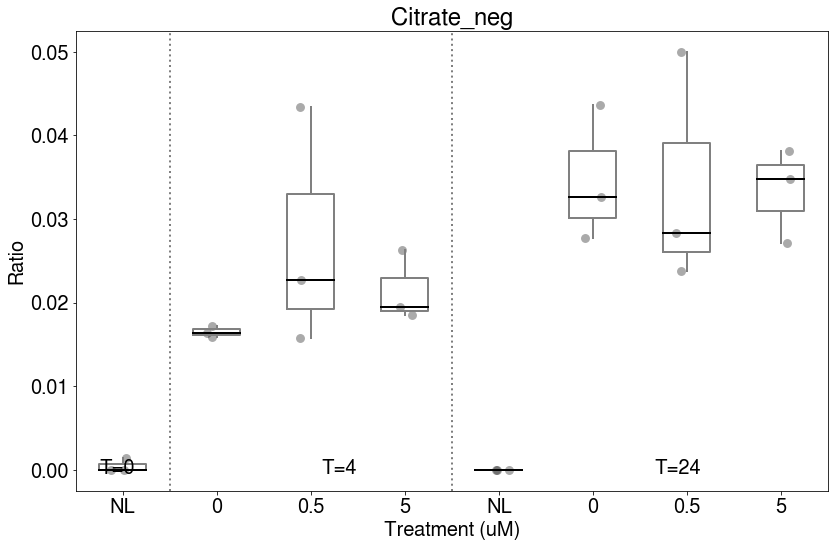

Malate_neg
correlations
[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0052, 0.0065, 0.0077, 0.0065, 0.0058, 0.0076, 0.0068, 0.0058, 0.0031]
Spearman -0.26574700172636695 0.48948130837712367
Pearson -0.3823315208030127 0.3098685177562481
linear regression -0.3823315208030126 0.30986851775624796

[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0105, 0.0143, 0.0122, 0.0149, 0.0151, 0.013, 0.0147, 0.0138, 0.0158]
Spearman 0.5797509043642028 0.10178621499687125
Pearson 0.6346786370948685 0.06632778585181176
linear regression 0.6346786370948686 0.06632778585181166
boxplots
[0.0052 0.0065 0.0077] [0.0065 0.0058 0.0076] 4.5 1.0
[0.0052 0.0065 0.0077] [0.0068 0.0058 0.0031] 6.0 0.7
[0.0105 0.0143 0.0122] [0.0149 0.0151 0.013 ] 1.0 0.2
[0.0105 0.0143 0.0122] [0.0147 0.0138 0.0158] 1.0 0.2


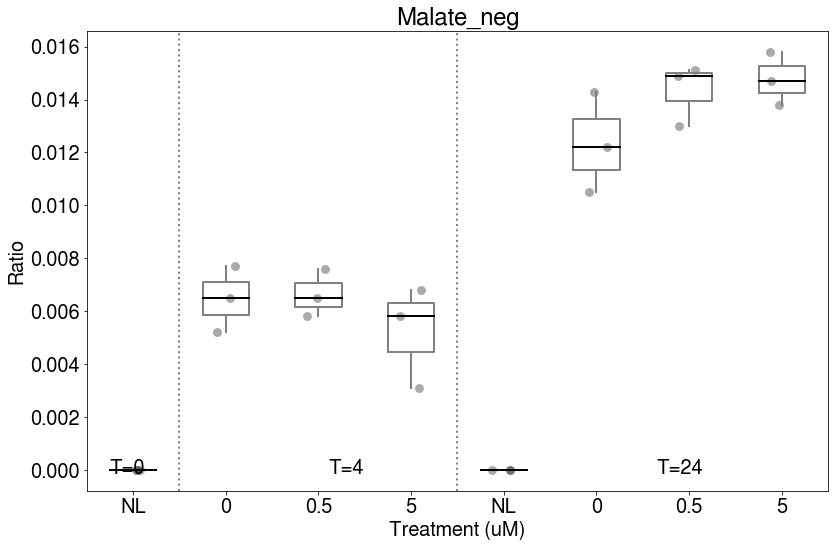

Glutamine_neg
correlations
[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0043, 0.0051, 0.005, 0.0053, 0.006, 0.0055, 0.0043, 0.0083, 0.0076]
Spearman 0.5292561240249632 0.14285171761895832
Pearson 0.6028163771975679 0.08575516932802632
linear regression 0.6028163771975679 0.08575516932802621

[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0058, 0.0101, 0.0074, 0.0052, 0.0044, 0.0087, 0.0079, 0.0075, 0.0066]
Spearman 0.0 1.0
Pearson -0.10555509290001493 0.7869515119642281
linear regression -0.10555509290001495 0.7869515119642279
boxplots
[0.0043 0.0051 0.005 ] [0.0053 0.006  0.0055] 0.0 0.1
[0.0043 0.0051 0.005 ] [0.0043 0.0083 0.0076] 2.5 0.5065551690490403
[0.0058 0.0101 0.0074] [0.0052 0.0044 0.0087] 7.0 0.4
[0.0058 0.0101 0.0074] [0.0079 0.0075 0.0066] 4.0 1.0


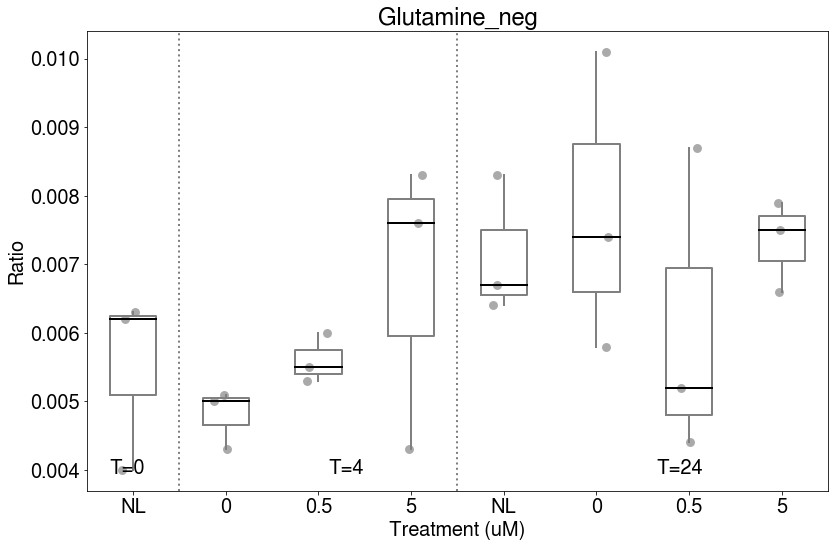

GSH_neg
correlations
[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0, 0.0047, 0.0, 0.0019, 0.0, 0.0, 0.0042, 0.0, 0.0]
Spearman -0.06262242910851494 0.8728428060426379
Pearson -0.03703398909751518 0.9246411521229717
linear regression -0.03703398909751522 0.9246411521229718

[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0071, 0.0049, 0.0167, 0.0074, 0.01, 0.0057, 0.0073, 0.004, 0.0083]
Spearman -0.10540925533894596 0.7872404144981762
Pearson -0.3505709205247943 0.35498112440988955
linear regression -0.35057092052479427 0.3549811244098893
boxplots
[0.     0.0047 0.    ] [0.0019 0.     0.    ] 5.0 1.0
[0.     0.0047 0.    ] [0.0042 0.     0.    ] 5.0 1.0
[0.0071 0.0049 0.0167] [0.0074 0.01   0.0057] 4.0 1.0
[0.0071 0.0049 0.0167] [0.0073 0.004  0.0083] 5.0 1.0


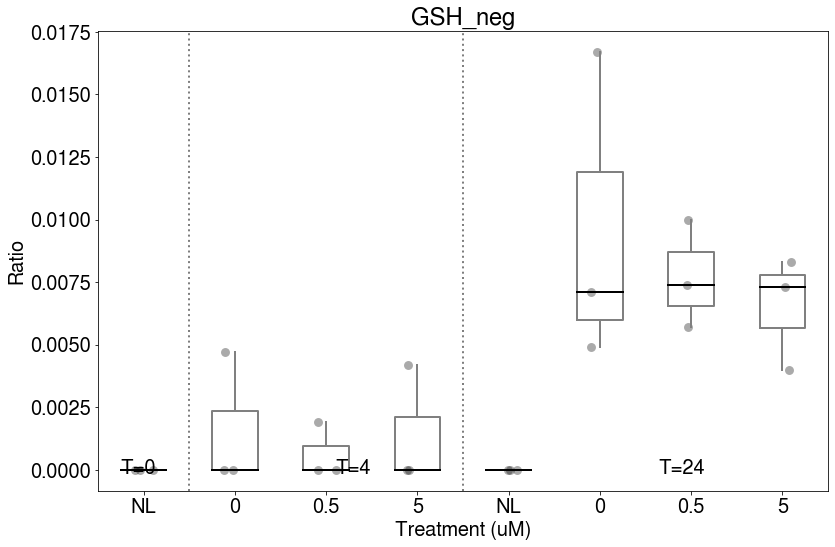

NAD_NEG_540
correlations
[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0004, 0.0007, 0.0003, 0.0003, 0.0003, 0.0002, 0.0005, 0.0, 0.0005]
Spearman -0.16151457061744967 0.6780344409131502
Pearson -0.2876779808912305 0.45287441260947503
linear regression -0.2876779808912304 0.45287441260947514

[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0318, 0.0365, 0.0332, 0.0339, 0.0357, 0.0365, 0.043, 0.0365, 0.0369]
Spearman 0.7504787743864564 0.019818896640581375
Pearson 0.677805097369955 0.044820249828557944
linear regression 0.6778050973699548 0.04482024982855804


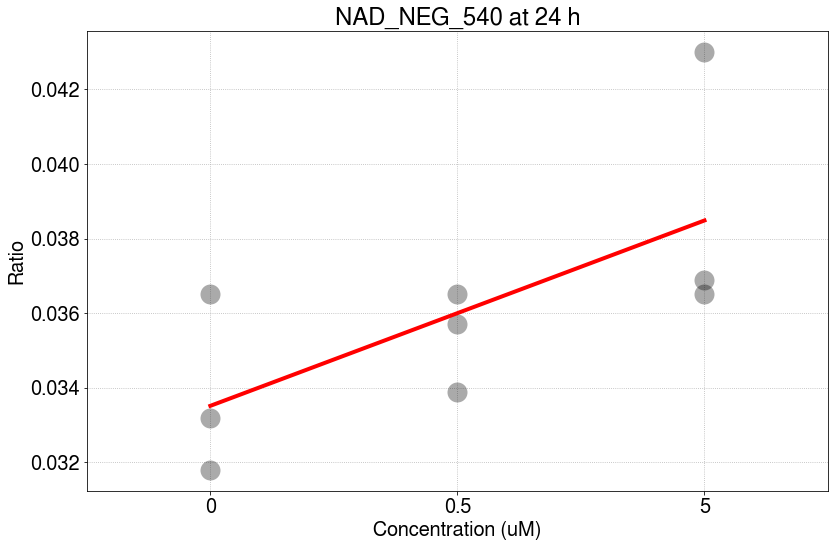

boxplots
[0.0004 0.0007 0.0003] [0.0003 0.0003 0.0002] 8.0 0.16415972847851523
[0.0004 0.0007 0.0003] [0.0005 0.     0.0005] 5.0 1.0
[0.0318 0.0365 0.0332] [0.0339 0.0357 0.0365] 2.5 0.5065551690490403
[0.0318 0.0365 0.0332] [0.043  0.0365 0.0369] 0.5 0.12118327283746319


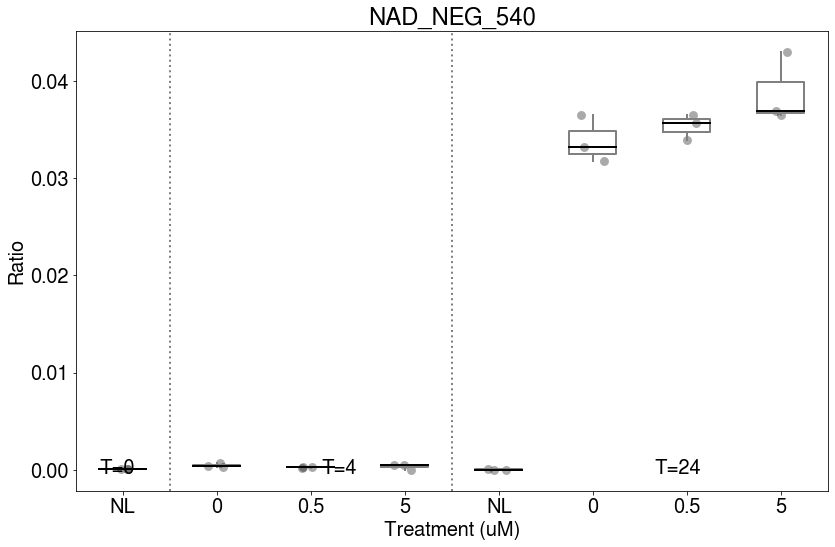

UDPacetylGlucosamine_neg
correlations
[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0468, 0.0512, 0.0454, 0.0399, 0.0493, 0.047, 0.0472, 0.0433, 0.0442]
Spearman -0.3162277660168379 0.40708382206558924
Pearson -0.37627448967806976 0.3182367995628345
linear regression -0.3762744896780697 0.31823679956283457

[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0888, 0.0805, 0.0872, 0.0875, 0.0862, 0.0875, 0.0837, 0.0927, 0.0795]
Spearman -0.10585122480499264 0.7863649472799403
Pearson -0.020967062155350935 0.9573018967272
linear regression -0.020967062155351008 0.9573018967272
boxplots
[0.0468 0.0512 0.0454] [0.0399 0.0493 0.047 ] 5.0 1.0
[0.0468 0.0512 0.0454] [0.0472 0.0433 0.0442] 7.0 0.4
[0.0888 0.0805 0.0872] [0.0875 0.0862 0.0875] 4.0 1.0
[0.0888 0.0805 0.0872] [0.0837 0.0927 0.0795] 5.0 1.0


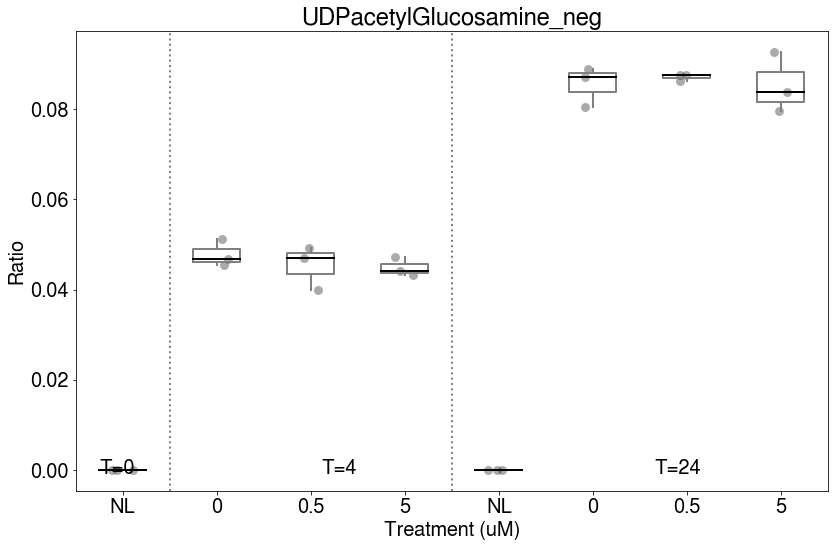

Inosine
correlations
[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0172, 0.0073, 0.0052, 0.0069, 0.0003, 0.0019, 0.0044, 0.0, 0.0047]
Spearman -0.6851601597031488 0.04167471235395344
Pearson -0.5748959092258167 0.10537578862187388
linear regression -0.5748959092258165 0.10537578862187393

[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0506, 0.0504, 0.0457, 0.0447, 0.0418, 0.035, 0.042, 0.0213, 0.027]
Spearman -0.8432740427115677 0.004289748768094628
Pearson -0.8012560074164258 0.009430344065706598
linear regression -0.8012560074164256 0.009430344065706645


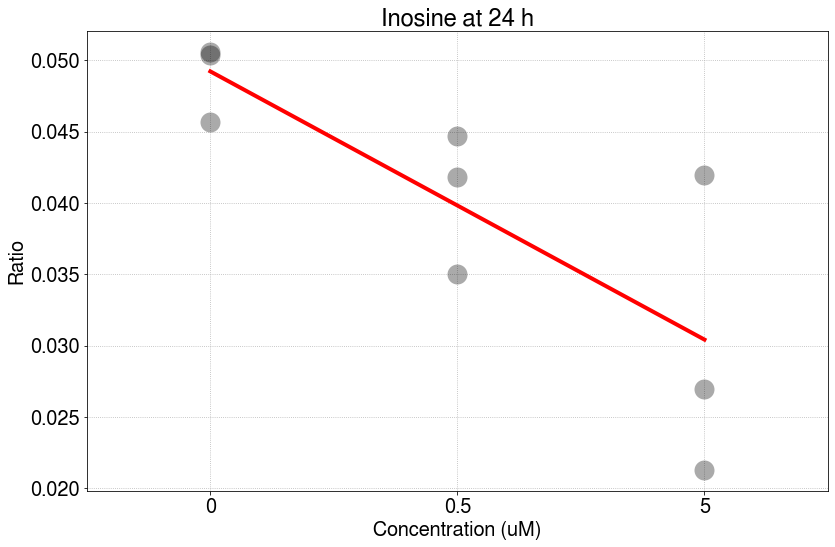

boxplots
[0.0172 0.0073 0.0052] [0.0069 0.0003 0.0019] 8.0 0.2
[0.0172 0.0073 0.0052] [0.0044 0.     0.0047] 9.0 0.1
[0.0506 0.0504 0.0457] [0.0447 0.0418 0.035 ] 9.0 0.1
[0.0506 0.0504 0.0457] [0.042  0.0213 0.027 ] 9.0 0.1


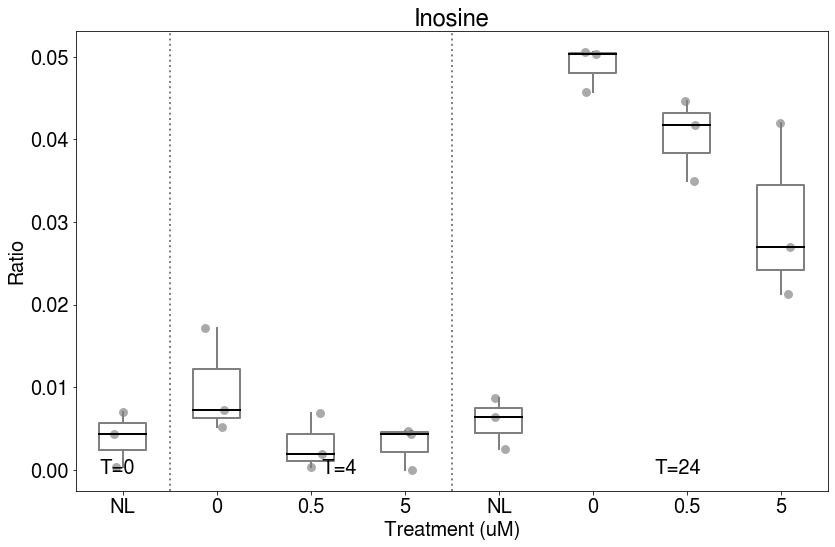

Adenosine in ADP
correlations
[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0257, 0.0096, 0.0179, 0.0066, 0.0158, 0.0087, 0.0059, 0.0006, 0.0208]
Spearman -0.5270462766947299 0.14483925554394786
Pearson -0.4610672717777237 0.21161087296518172
linear regression -0.4610672717777236 0.21161087296518188

[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0507, 0.0584, 0.0749, 0.0706, 0.0767, 0.0568, 0.0603, 0.0777, 0.0467]
Spearman 0.10540925533894596 0.7872404144981762
Pearson 0.008682636244823273 0.9823129898804454
linear regression 0.008682636244823263 0.9823129898804455
boxplots
[0.0257 0.0096 0.0179] [0.0066 0.0158 0.0087] 8.0 0.2
[0.0257 0.0096 0.0179] [0.0059 0.0006 0.0208] 7.0 0.4
[0.0507 0.0584 0.0749] [0.0706 0.0767 0.0568] 3.0 0.7
[0.0507 0.0584 0.0749] [0.0603 0.0777 0.0467] 4.0 1.0


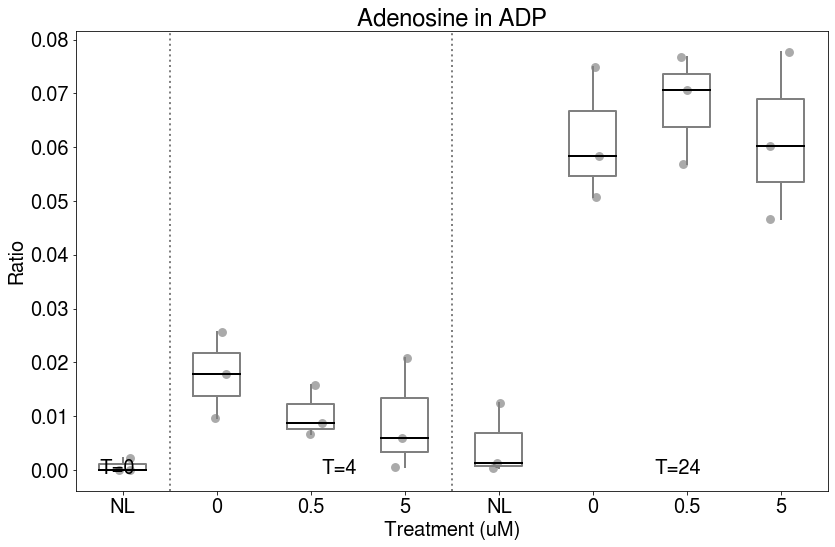

UDPglucose
correlations
[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.424, 0.492, 0.47043, 0.49296, 0.37889, 0.43486, 0.41388, 0.45714, 0.37254]
Spearman -0.47434164902525694 0.19702207215775042
Pearson -0.46229473784313696 0.21023755743037248
linear regression -0.46229473784313707 0.2102375574303725

[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.39648, 0.4492, 0.3864, 0.42121, 0.37809, 0.5093, 0.40917, 0.51251, 0.40811]
Spearman 0.3162277660168379 0.40708382206558924
Pearson 0.28084175883613427 0.46415582760669344
linear regression 0.28084175883613416 0.4641558276066938
boxplots
[0.424   0.492   0.47043] [0.49296 0.37889 0.43486] 5.0 1.0
[0.424   0.492   0.47043] [0.41388 0.45714 0.37254] 8.0 0.2
[0.39648 0.4492  0.3864 ] [0.42121 0.37809 0.5093 ] 4.0 1.0
[0.39648 0.4492  0.3864 ] [0.40917 0.51251 0.40811] 2.0 0.4


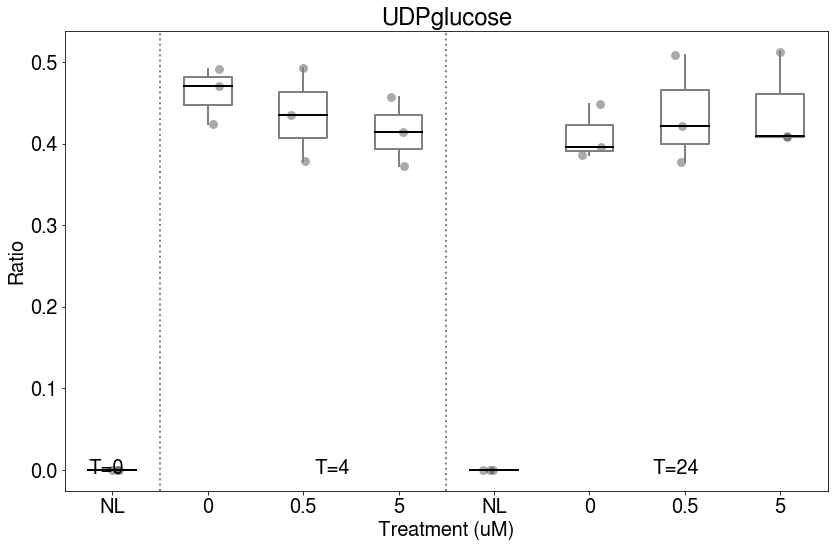

AMP
correlations
[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0004, 0.0007, 0.0, 0.0005, 0.0043, 0.0076, 0.0001, 0.0018, 0.0007]
Spearman 0.2646280620124816 0.4913809218696925
Pearson 0.08484828862099261 0.8281821276360688
linear regression 0.08484828862099261 0.828182127636069

[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0214, 0.0155, 0.0253, 0.0211, 0.0296, 0.0271, 0.0264, 0.0334, 0.0215]
Spearman 0.5270462766947299 0.14483925554394786
Pearson 0.5171665502417645 0.15392199957680067
linear regression 0.5171665502417645 0.15392199957680058
boxplots
[0.0004 0.0007 0.    ] [0.0005 0.0043 0.0076] 1.0 0.2
[0.0004 0.0007 0.    ] [0.0001 0.0018 0.0007] 2.5 0.5065551690490403
[0.0214 0.0155 0.0253] [0.0211 0.0296 0.0271] 2.0 0.4
[0.0214 0.0155 0.0253] [0.0264 0.0334 0.0215] 1.0 0.2


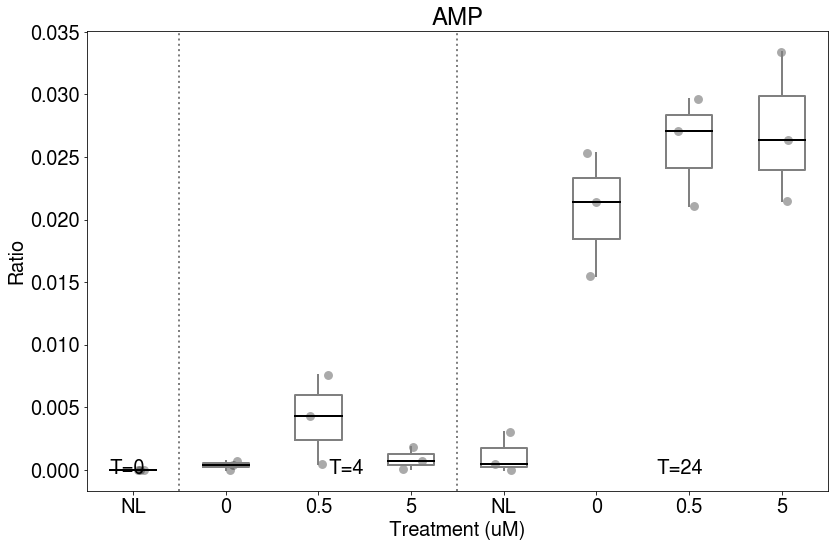

ADP
correlations
[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0, 0.0059, 0.0184, 0.0, 0.0, 0.0177, 0.0023, 0.0, 0.0]
Spearman -0.40414518843273806 0.28067108485196735
Pearson -0.4125776879570922 0.26978404440803305
linear regression -0.4125776879570921 0.2697840444080334

[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0123, 0.0088, 0.0101, 0.0326, 0.0107, 0.02, 0.0027, 0.019, 0.0131]
Spearman 0.21081851067789192 0.5861141333812968
Pearson 0.06049198576284989 0.8771419075513416
linear regression 0.0604919857628499 0.877141907551342
boxplots
[0.     0.0059 0.0184] [0.     0.     0.0177] 6.0 0.6428348264908044
[0.     0.0059 0.0184] [0.0023 0.     0.    ] 7.0 0.3536785173184648
[0.0123 0.0088 0.0101] [0.0326 0.0107 0.02  ] 1.0 0.2
[0.0123 0.0088 0.0101] [0.0027 0.019  0.0131] 3.0 0.7


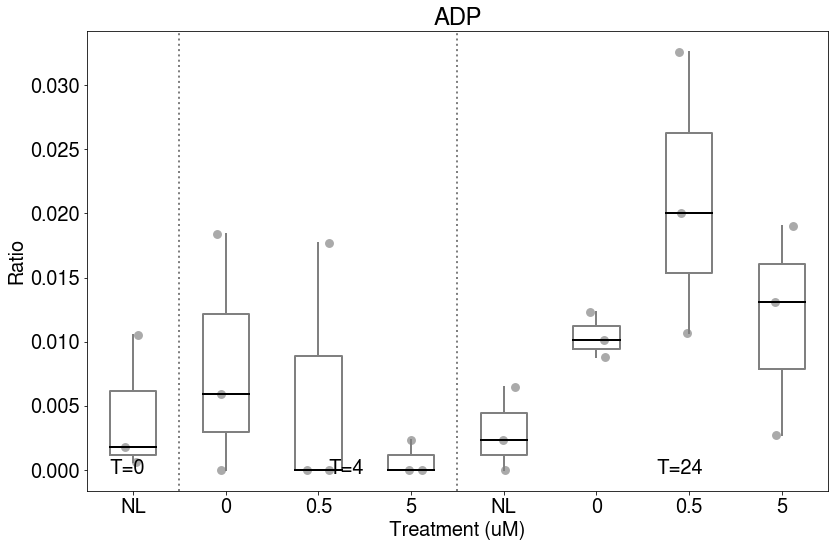

CMP
correlations
[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0, 0.0, 0.0, 0.0035, 0.0007, 0.0009, 0.0018, 0.0031, 0.0026]
Spearman 0.8040844011283461 0.008995482172242303
Pearson 0.7772125052715735 0.01371330453894759
linear regression 0.7772125052715734 0.013713304538947629


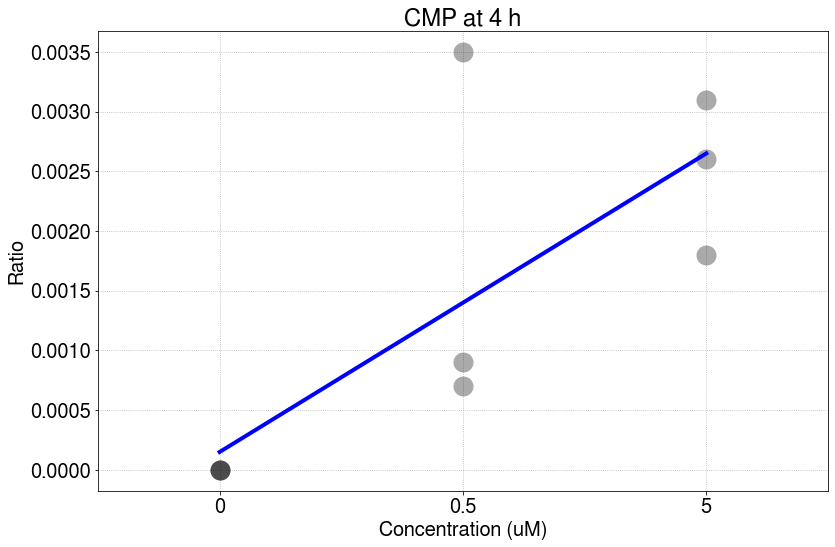


[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0174, 0.0115, 0.0043, 0.006, 0.0047, 0.0067, 0.0138, 0.0061, 0.0282]
Spearman 0.26352313834736496 0.4932597104489965
Pearson 0.27286631520075627 0.4774664486986175
linear regression 0.27286631520075627 0.47746644869861754
boxplots
[0. 0. 0.] [0.0035 0.0007 0.0009] 0.0 0.06360256962075367
[0. 0. 0.] [0.0018 0.0031 0.0026] 0.0 0.06360256962075367
[0.0174 0.0115 0.0043] [0.006  0.0047 0.0067] 6.0 0.7
[0.0174 0.0115 0.0043] [0.0138 0.0061 0.0282] 3.0 0.7


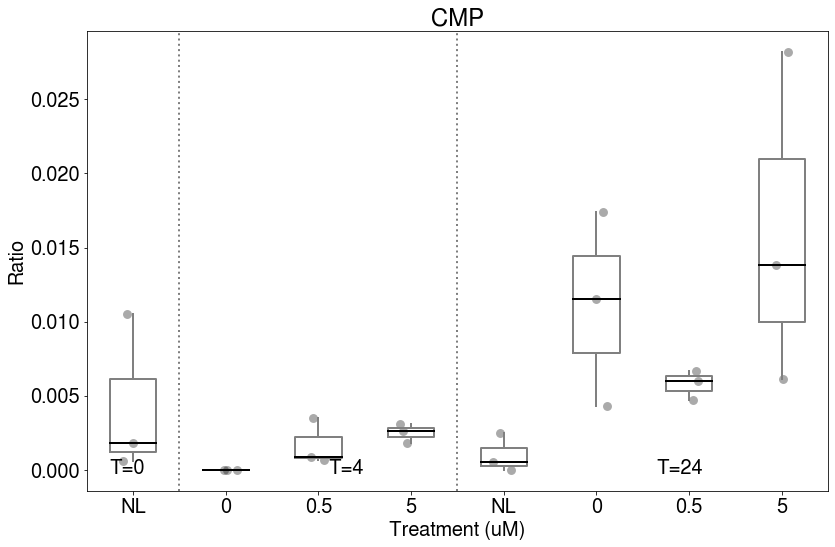

dTMP
correlations
[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0003, 0.0, 0.0017, 0.0027, 0.0027, 0.0021, 0.0029, 0.0015, 0.002]
Spearman 0.5292561240249632 0.14285171761895832
Pearson 0.614678631849824 0.07815933717038445
linear regression 0.6146786318498237 0.07815933717038452

[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0194, 0.0176, 0.0169, 0.0313, 0.0141, 0.0111, 0.0142, 0.0152, 0.0136]
Spearman -0.5270462766947299 0.14483925554394786
Pearson -0.2676288792859318 0.4862933153955085
linear regression -0.26762887928593176 0.486293315395509
boxplots
[0.0003 0.     0.0017] [0.0027 0.0027 0.0021] 0.0 0.07652250047505922
[0.0003 0.     0.0017] [0.0029 0.0015 0.002 ] 1.0 0.2
[0.0194 0.0176 0.0169] [0.0313 0.0141 0.0111] 6.0 0.7
[0.0194 0.0176 0.0169] [0.0142 0.0152 0.0136] 9.0 0.1


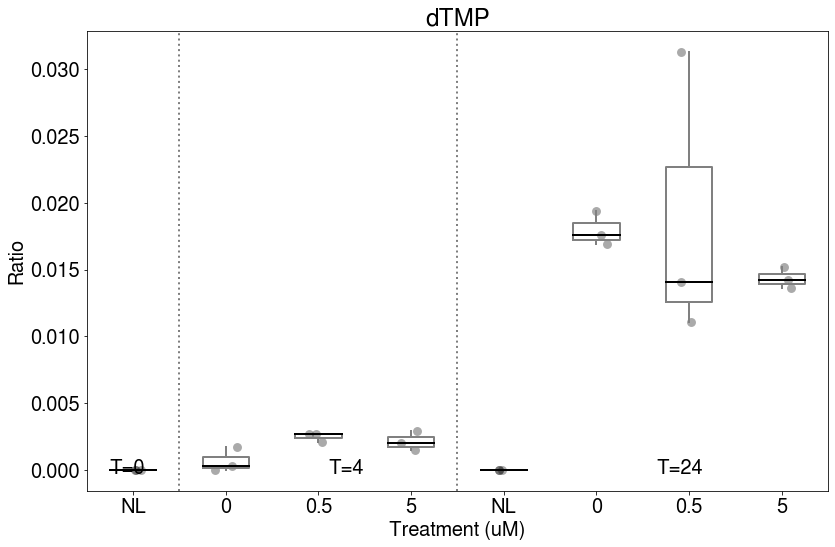

phosphocholine
correlations
[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0034, 0.0047, 0.0034, 0.007, 0.0024, 0.0016, 0.0035, 0.0038, 0.0039]
Spearman 0.15877683720748895 0.6832609514077338
Pearson -0.02867522000217651 0.9416233351758306
linear regression -0.028675220002176507 0.9416233351758306

[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0391, 0.0278, 0.0358, 0.0331, 0.0277, 0.0222, 0.0303, 0.0347, 0.0291]
Spearman -0.21081851067789192 0.5861141333812968
Pearson -0.2426540229925696 0.5292866908102132
linear regression -0.24265402299256955 0.5292866908102134
boxplots
[0.0034 0.0047 0.0034] [0.007  0.0024 0.0016] 6.0 0.6579050194284821
[0.0034 0.0047 0.0034] [0.0035 0.0038 0.0039] 3.0 0.6579050194284821
[0.0391 0.0278 0.0358] [0.0331 0.0277 0.0222] 8.0 0.2
[0.0391 0.0278 0.0358] [0.0303 0.0347 0.0291] 6.0 0.7


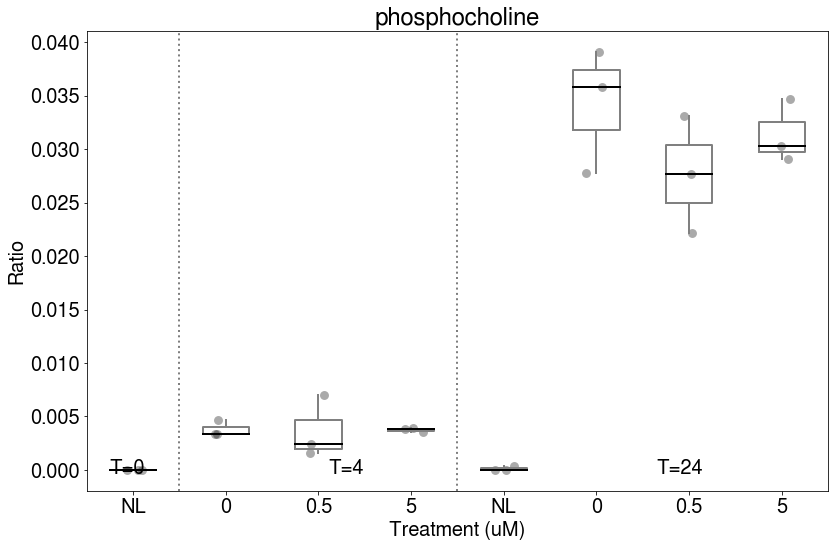

phosphoryletanolamine
correlations
[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0006, 0.0003, 0.0011, 0.0009, 0.0022, 0.0017, 0.0018, 0.0002, 0.0024]
Spearman 0.3689323936863109 0.32853035182439455
Pearson 0.42550694581735066 0.2535305520666739
linear regression 0.42550694581735066 0.2535305520666739

[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0176, 0.0164, 0.0165, 0.0155, 0.0157, 0.0187, 0.0173, 0.0182, 0.0186]
Spearman 0.3689323936863109 0.32853035182439455
Pearson 0.4307748951706423 0.2470617941591214
linear regression 0.43077489517064227 0.24706179415912144
boxplots
[0.0006 0.0003 0.0011] [0.0009 0.0022 0.0017] 1.0 0.2
[0.0006 0.0003 0.0011] [0.0018 0.0002 0.0024] 3.0 0.7
[0.0176 0.0164 0.0165] [0.0155 0.0157 0.0187] 6.0 0.7
[0.0176 0.0164 0.0165] [0.0173 0.0182 0.0186] 1.0 0.2


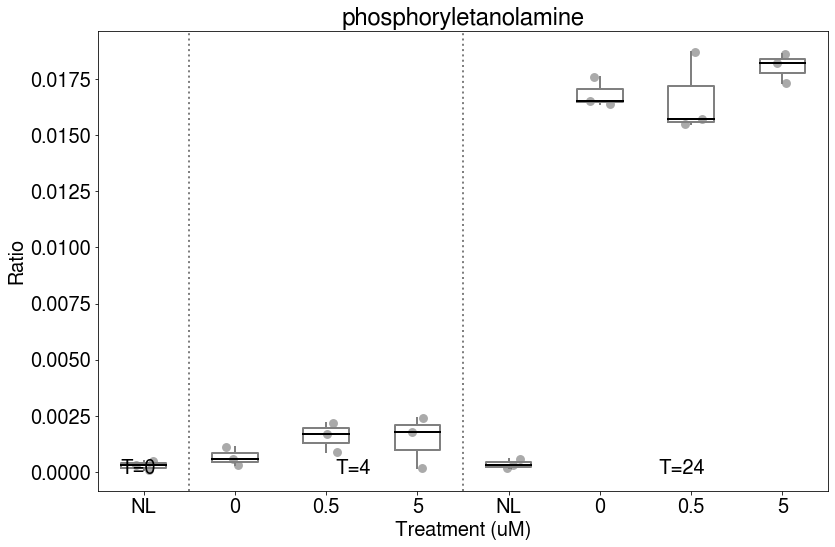

AcetylCarnitine
correlations
[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0261, 0.0312, 0.0304, 0.0276, 0.0292, 0.0287, 0.0285, 0.032, 0.0317]
Spearman 0.3162277660168379 0.40708382206558924
Pearson 0.32634982392155915 0.3913802273154899
linear regression 0.32634982392155903 0.39138022731549044

[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0372, 0.0373, 0.0464, 0.0374, 0.037, 0.0349, 0.0348, 0.0025, 0.0373]
Spearman -0.5821817364274595 0.10001726989218765
Pearson -0.5456780173986209 0.12858473831489184
linear regression -0.5456780173986208 0.12858473831489195
boxplots
[0.0261 0.0312 0.0304] [0.0276 0.0292 0.0287] 6.0 0.7
[0.0261 0.0312 0.0304] [0.0285 0.032  0.0317] 2.0 0.4
[0.0372 0.0373 0.0464] [0.0374 0.037  0.0349] 7.0 0.4
[0.0372 0.0373 0.0464] [0.0348 0.0025 0.0373] 7.5 0.26828588367711736


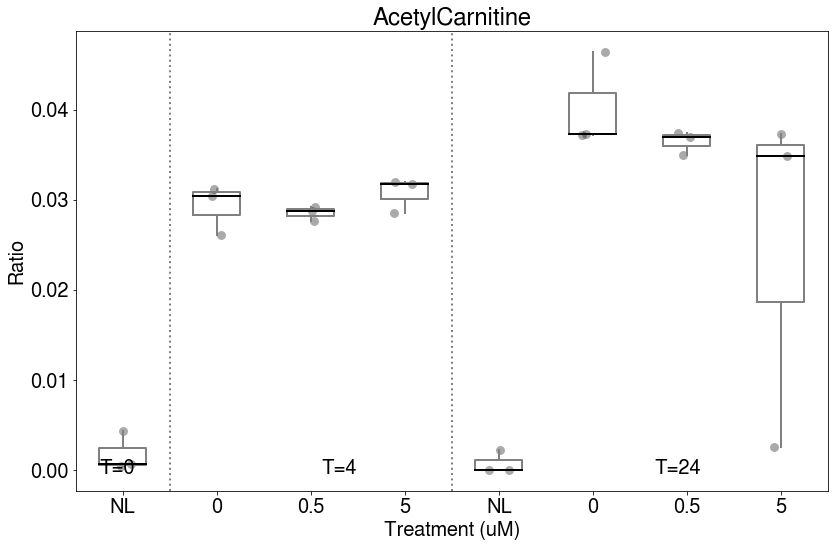

LPC160
correlations
[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0222, 0.022, 0.0221, 0.022, 0.023, 0.023, 0.0233, 0.0223, 0.0222]
Spearman 0.560448538317805 0.11650595899091136
Pearson 0.4327723395634617 0.2446324220871453
linear regression 0.4327723395634617 0.24463242208714528

[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0489, 0.0463, 0.0455, 0.0475, 0.0453, 0.0469, 0.0443, 0.0438, 0.0472]
Spearman -0.42163702135578385 0.25833942502696056
Pearson -0.4793738692337649 0.19164327043720095
linear regression -0.4793738692337648 0.19164327043720117
boxplots
[0.0222 0.022  0.0221] [0.022 0.023 0.023] 2.5 0.5001842570707944
[0.0222 0.022  0.0221] [0.0233 0.0223 0.0222] 0.5 0.12118327283746319
[0.0489 0.0463 0.0455] [0.0475 0.0453 0.0469] 5.0 1.0
[0.0489 0.0463 0.0455] [0.0443 0.0438 0.0472] 7.0 0.4


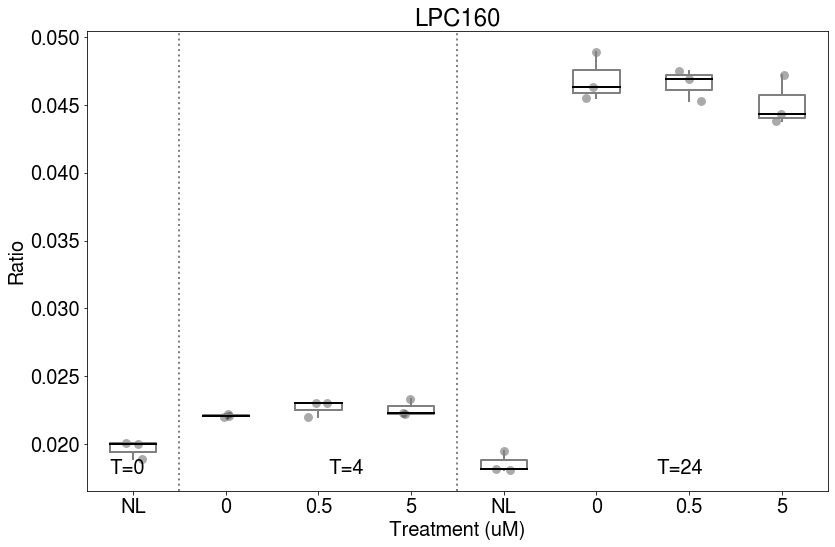

Glycerophosphocholine
correlations
[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0027, 0.0027, 0.0028, 0.0032, 0.0031, 0.0029, 0.0037, 0.003, 0.0036]
Spearman 0.8468097984399411 0.003974909278224991
Pearson 0.8266606127033279 0.005999653194627267
linear regression 0.8266606127033277 0.0059996531946272915


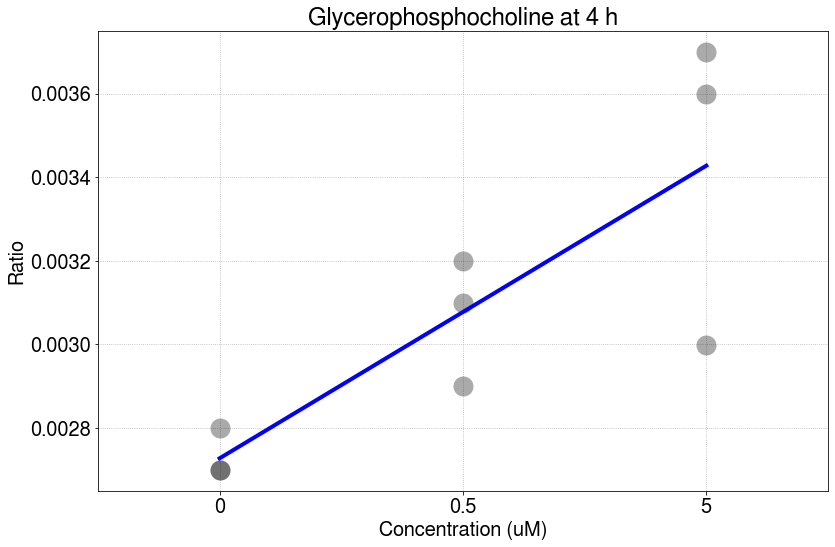


[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0236, 0.0244, 0.0239, 0.0248, 0.023, 0.0243, 0.0245, 0.0244, 0.0242]
Spearman 0.3704792868174742 0.32634804024515784
Pearson 0.31785059236148394 0.40454701063013637
linear regression 0.31785059236148383 0.4045470106301367
boxplots
[0.0027 0.0027 0.0028] [0.0032 0.0031 0.0029] 0.0 0.07652250047505922
[0.0027 0.0027 0.0028] [0.0037 0.003  0.0036] 0.0 0.07652250047505922
[0.0236 0.0244 0.0239] [0.0248 0.023  0.0243] 4.0 1.0
[0.0236 0.0244 0.0239] [0.0245 0.0244 0.0242] 1.5 0.26828588367711736


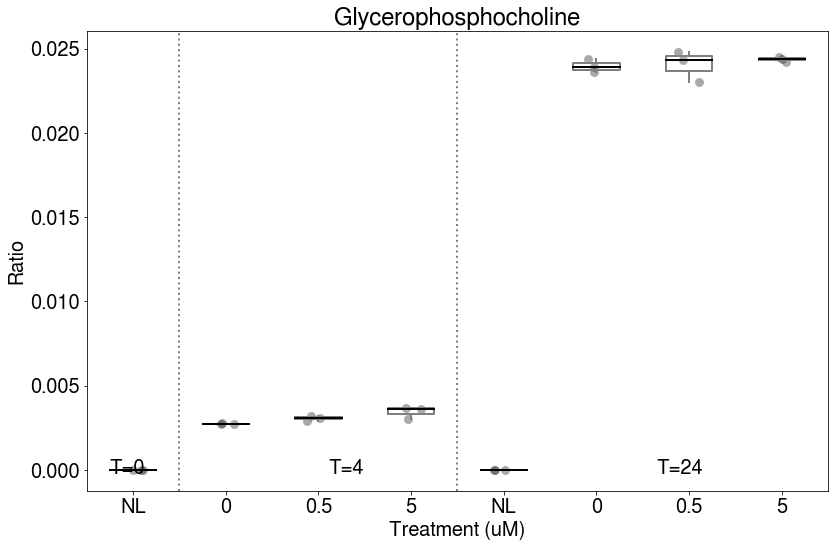

GSSG
correlations
[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0013, 0.004, 0.0016, 0.0006, 0.003, 0.0013, 0.0037, 0.0041, 0.0028]
Spearman 0.34401648061622603 0.36466419938522243
Pearson 0.405314692553823 0.2791477373222525
linear regression 0.4053146925538229 0.2791477373222526

[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0206, 0.0196, 0.0207, 0.0208, 0.0215, 0.0194, 0.0201, 0.0213, 0.0228]
Spearman 0.42163702135578385 0.25833942502696056
Pearson 0.4577450474621673 0.21535264197374582
linear regression 0.4577450474621672 0.2153526419737461
boxplots
[0.0013 0.004  0.0016] [0.0006 0.003  0.0013] 6.5 0.5065551690490403
[0.0013 0.004  0.0016] [0.0037 0.0041 0.0028] 2.0 0.4
[0.0206 0.0196 0.0207] [0.0208 0.0215 0.0194] 3.0 0.7
[0.0206 0.0196 0.0207] [0.0201 0.0213 0.0228] 2.0 0.4


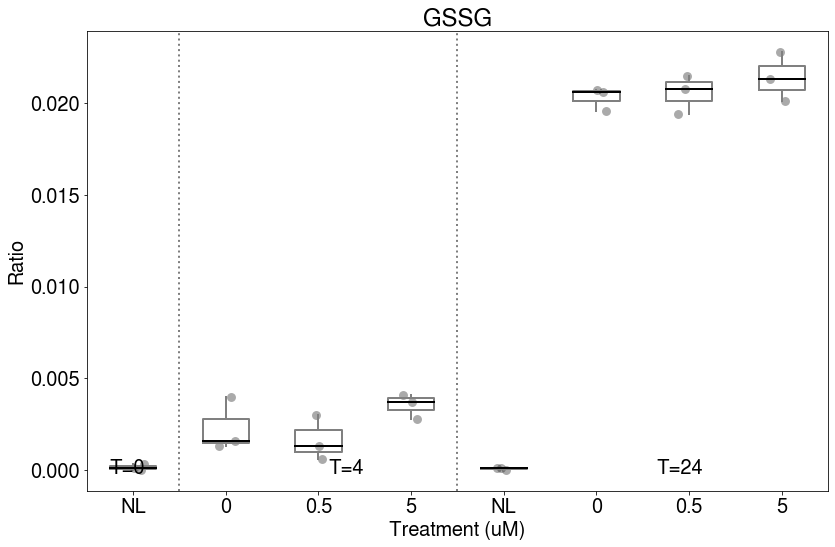

Adenosine
correlations
[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.023, 0.0176, 0.0201, 0.0316, 0.0292, 0.0486, 0.0231, 0.036, 0.0577]
Spearman 0.7378647873726218 0.02323723139995463
Pearson 0.5975334382587683 0.08927889562235719
linear regression 0.5975334382587681 0.08927889562235719

[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0474, 0.0393, 0.0579, 0.0638, 0.0755, 0.0635, 0.0522, 0.0654, 0.0559]
Spearman 0.3689323936863109 0.32853035182439455
Pearson 0.3879542974169014 0.3022010625056913
linear regression 0.38795429741690135 0.3022010625056913
boxplots
[0.023  0.0176 0.0201] [0.0316 0.0292 0.0486] 0.0 0.1
[0.023  0.0176 0.0201] [0.0231 0.036  0.0577] 0.0 0.1
[0.0474 0.0393 0.0579] [0.0638 0.0755 0.0635] 0.0 0.1
[0.0474 0.0393 0.0579] [0.0522 0.0654 0.0559] 2.0 0.4


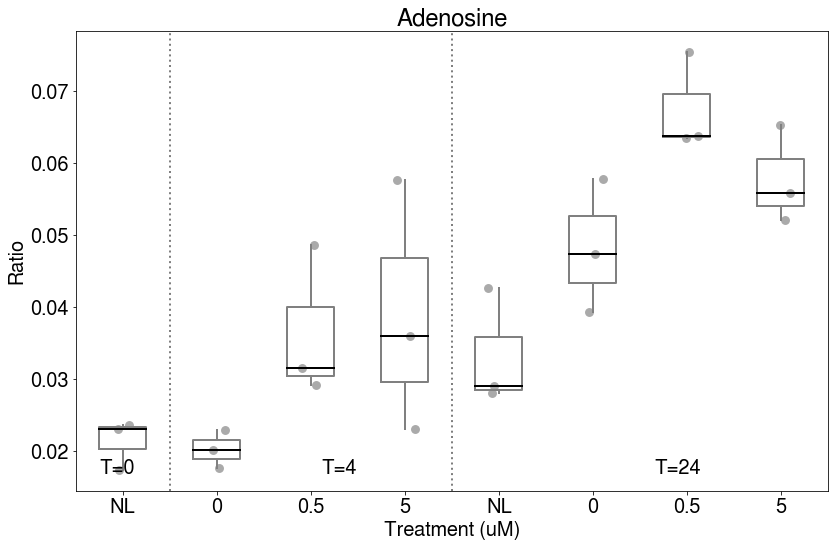

nACSpermidine
correlations
[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0154, 0.0186, 0.0139, 0.0079, 0.0078, 0.0194, 0.015, 0.0122, 0.0124]
Spearman -0.3689323936863109 0.32853035182439455
Pearson -0.2933149089866026 0.4436625215038265
linear regression -0.29331490898660256 0.4436625215038268

[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0376, 0.0282, 0.0406, 0.0251, 0.0227, 0.0281, 0.0256, 0.0197, 0.0229]
Spearman -0.7905694150420948 0.011201432554090134
Pearson -0.7918429314437381 0.01097951364933589
linear regression -0.791842931443738 0.010979513649335906


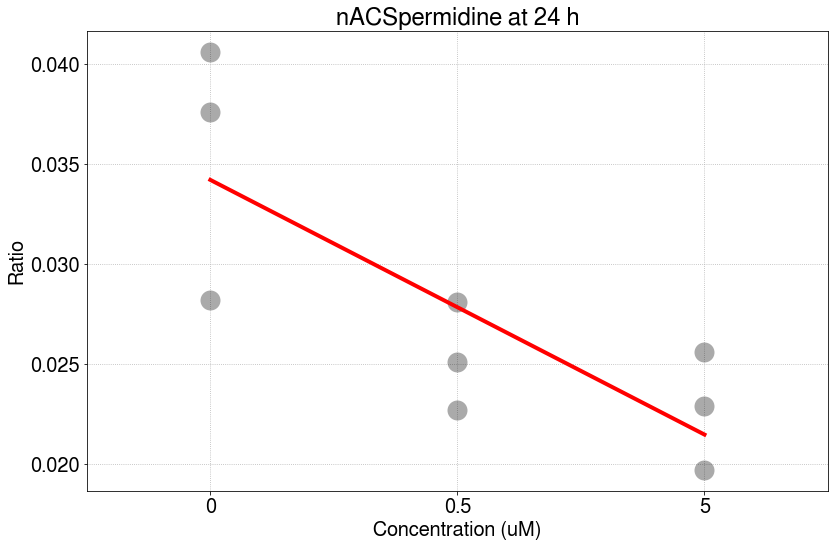

boxplots
[0.0154 0.0186 0.0139] [0.0079 0.0078 0.0194] 6.0 0.7
[0.0154 0.0186 0.0139] [0.015  0.0122 0.0124] 8.0 0.2
[0.0376 0.0282 0.0406] [0.0251 0.0227 0.0281] 9.0 0.1
[0.0376 0.0282 0.0406] [0.0256 0.0197 0.0229] 9.0 0.1


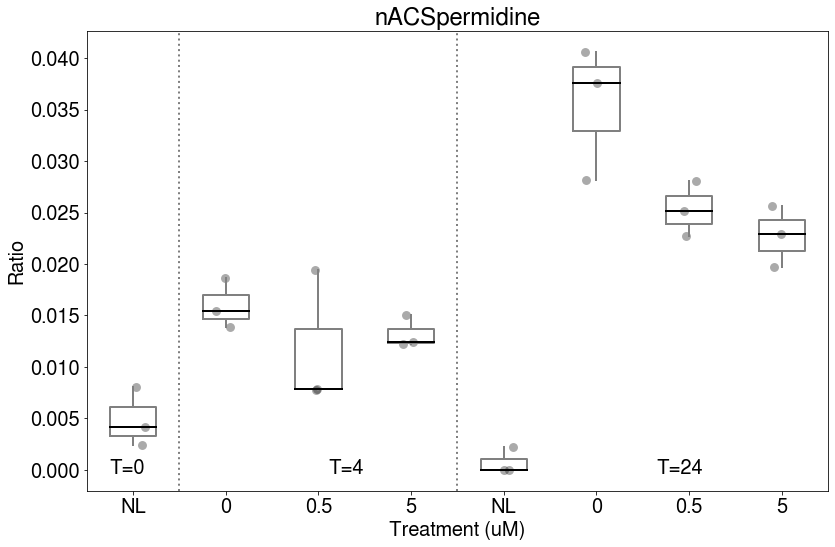

Aspartate
correlations
[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0308, 0.0277, 0.0352, 0.0307, 0.0332, 0.0364, 0.0354, 0.0348, 0.0321]
Spearman 0.3689323936863109 0.32853035182439455
Pearson 0.4374490197443453 0.23899489108762034
linear regression 0.4374490197443453 0.23899489108762031

[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.055, 0.0526, 0.0531, 0.0515, 0.0588, 0.0557, 0.0514, 0.0527, 0.0558]
Spearman -0.05270462766947298 0.892879242924744
Pearson -0.047338106833115234 0.9037435057467403
linear regression -0.04733810683311522 0.9037435057467404
boxplots
[0.0308 0.0277 0.0352] [0.0307 0.0332 0.0364] 3.0 0.7
[0.0308 0.0277 0.0352] [0.0354 0.0348 0.0321] 2.0 0.4
[0.055  0.0526 0.0531] [0.0515 0.0588 0.0557] 3.0 0.7
[0.055  0.0526 0.0531] [0.0514 0.0527 0.0558] 5.0 1.0


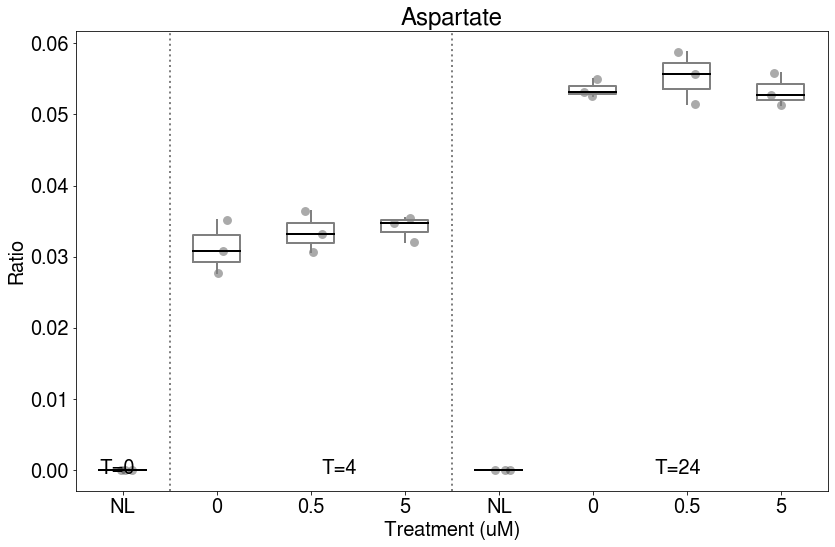

Glutamate
correlations
[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0372, 0.036, 0.0343, 0.0324, 0.038, 0.0338, 0.034, 0.0348, 0.0374]
Spearman -0.05270462766947298 0.892879242924744
Pearson -0.09788742199249141 0.8021708403702886
linear regression -0.09788742199249138 0.8021708403702892

[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0605, 0.0606, 0.0598, 0.0617, 0.0551, 0.0595, 0.0603, 0.0532, 0.0602]
Spearman -0.3689323936863109 0.32853035182439455
Pearson -0.36467345487525626 0.3345759947030373
linear regression -0.36467345487525626 0.3345759947030371
boxplots
[0.0372 0.036  0.0343] [0.0324 0.038  0.0338] 6.0 0.7
[0.0372 0.036  0.0343] [0.034  0.0348 0.0374] 5.0 1.0
[0.0605 0.0606 0.0598] [0.0617 0.0551 0.0595] 6.0 0.7
[0.0605 0.0606 0.0598] [0.0603 0.0532 0.0602] 7.0 0.4


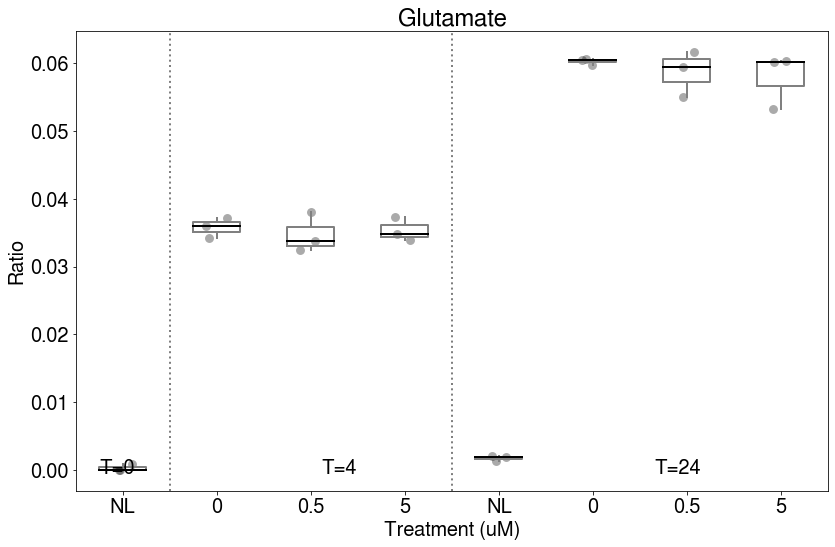

SAMe
correlations
[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0, 0.0, 0.0, 0.0004, 0.0, 0.0, 0.0, 0.0, 0.0]
Spearman 0.0 1.0
Pearson 0.0 1.0000000000000004
linear regression 0.0 1.0

[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0175, 0.0201, 0.0138, 0.0199, 0.0173, 0.0242, 0.0169, 0.0182, 0.0171]
Spearman -0.15811388300841894 0.6845283355605285
Pearson 0.040232002954236 0.9181505073832457
linear regression 0.04023200295423601 0.9181505073832464
boxplots
[0. 0. 0.] [0.0004 0.     0.    ] 3.0 0.5049850750938458
[0. 0. 0.] [0. 0. 0.] 4.5 1.0
[0.0175 0.0201 0.0138] [0.0199 0.0173 0.0242] 3.0 0.7
[0.0175 0.0201 0.0138] [0.0169 0.0182 0.0171] 5.0 1.0


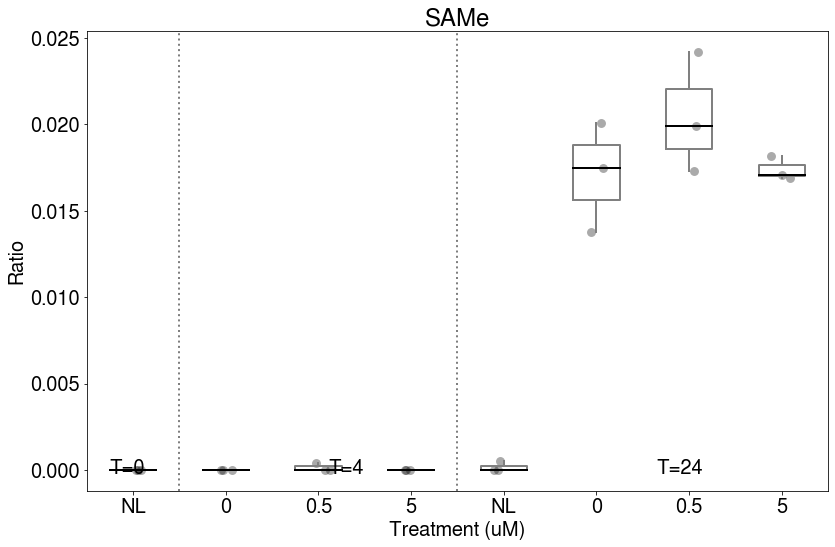

NAD-H
correlations
[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0, 0.0018, 0.0027, 0.0026, 0.0004, 0.0004, 0.0, 0.0027, 0.0]
Spearman -0.21629522817435007 0.5761860218914352
Pearson -0.2085517320733122 0.590240996172752
linear regression -0.20855173207331218 0.5902409961727526

[1, 1, 1, 2, 2, 2, 3, 3, 3]
[0.0337, 0.0322, 0.0321, 0.0342, 0.0321, 0.0328, 0.0324, 0.0314, 0.0329]
Spearman -0.07938841860374447 0.8391182501624815
Pearson -0.21626654321040306 0.576237862514349
linear regression -0.2162665432104031 0.5762378625143492
boxplots
[0.     0.0018 0.0027] [0.0026 0.0004 0.0004] 5.0 1.0
[0.     0.0018 0.0027] [0.     0.0027 0.    ] 5.5 0.8136637157667919
[0.0337 0.0322 0.0321] [0.0342 0.0321 0.0328] 3.5 0.8247780950825133
[0.0337 0.0322 0.0321] [0.0324 0.0314 0.0329] 5.0 1.0


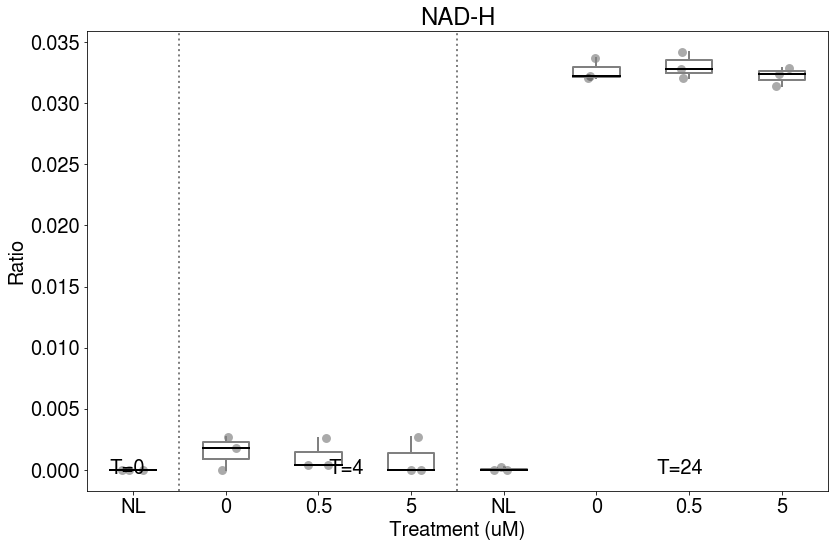

In [8]:
for metab in df.columns[7:]:
    
    print(metab)
        
    loc_four_egm = df[(df['Treatment'] == 0) & (df['Timepoint (h)'] == 4) & (df['13label'] == 'egm')][metab].values
    loc_four_zero = df[(df['Treatment'] == 0) & (df['Timepoint (h)'] == 4) & (df['13label'] == '1,2-13C Glucose')][metab].values
    loc_four_half = df[(df['Treatment'] == 0.5) & (df['Timepoint (h)'] == 4)][metab].values
    loc_four_five = df[(df['Treatment'] == 5) & (df['Timepoint (h)'] == 4)][metab].values

    loc_twentyfour_egm = df[(df['Treatment'] == 0) & (df['Timepoint (h)'] == 24) & (df['13label'] == 'egm')][metab].values
    loc_twentyfour_zero = df[(df['Treatment'] == 0) & (df['Timepoint (h)'] == 24) & (df['13label'] == '1,2-13C Glucose')][metab].values
    loc_twentyfour_half = df[(df['Treatment'] == 0.5) & (df['Timepoint (h)'] == 24)][metab].values
    loc_twentyfour_five = df[(df['Treatment'] == 5) & (df['Timepoint (h)'] == 24)][metab].values
    
    quant = [loc_four_egm, loc_four_zero, loc_four_half, loc_four_five, 
             loc_twentyfour_egm, loc_twentyfour_zero, loc_twentyfour_half, loc_twentyfour_five]
    
    ###
    ### correlations
    ###
    print('correlations')
    
    x = []; y = []
    for element in loc_four_zero:
        if ~numpy.isnan(element):
            x.append(1); y.append(element)
        
    for element in loc_four_half:
        if ~numpy.isnan(element):
            x.append(2); y.append(element)
        
    for element in loc_four_five:
        if ~numpy.isnan(element):
            x.append(3); y.append(element)
        
    print(x)
    print(y)
    correlation, pvalue = scipy.stats.spearmanr(x, y)
    print('Spearman', correlation, pvalue)
    
    correlation, pvalue = scipy.stats.pearsonr(x, y)
    print('Pearson', correlation, pvalue)
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    print('linear regression', r_value, p_value)
    line = (slope * numpy.array(x)) + intercept
    
    if p_value < 0.05:
        matplotlib.pyplot.plot(x, y, 'ok', alpha=1/3, ms=20, mew=0)
        matplotlib.pyplot.plot(x, line, '-', lw=4, color='blue')
        matplotlib.pyplot.xlim([0.5, 3.5])
        matplotlib.pyplot.xticks([1, 2, 3], ['0', '0.5', '5'])
        matplotlib.pyplot.xlabel('Concentration (uM)')
        matplotlib.pyplot.ylabel('Ratio')
        matplotlib.pyplot.title('{} at 4 h'.format(metab))
        matplotlib.pyplot.grid(ls=':')
        matplotlib.pyplot.tight_layout()
        matplotlib.pyplot.show()
        
    print()
    
    x = []; y = []
    for element in loc_twentyfour_zero:
        if ~numpy.isnan(element):
            x.append(1); y.append(element)
        
    for element in loc_twentyfour_half:
        if ~numpy.isnan(element):
            x.append(2); y.append(element)
        
    for element in loc_twentyfour_five:
        if ~numpy.isnan(element):
            x.append(3); y.append(element)
        
    print(x)
    print(y)
    correlation, pvalue = scipy.stats.spearmanr(x, y)
    print('Spearman', correlation, pvalue)
    
    correlation, pvalue = scipy.stats.pearsonr(x, y)
    print('Pearson', correlation, pvalue)
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    print('linear regression', r_value, p_value)
    line = (slope * numpy.array(x)) + intercept
    
    if p_value < 0.05:
        matplotlib.pyplot.plot(x, y, 'ok', alpha=1/3, ms=20, mew=0)
        matplotlib.pyplot.plot(x, line, '-', lw=4, color='red')
        matplotlib.pyplot.xlim([0.5, 3.5])
        matplotlib.pyplot.xticks([1, 2, 3], ['0', '0.5', '5'])
        matplotlib.pyplot.xlabel('Concentration (uM)')
        matplotlib.pyplot.ylabel('Ratio')
        matplotlib.pyplot.title('{} at 24 h'.format(metab))
        matplotlib.pyplot.grid(ls=':')
        matplotlib.pyplot.tight_layout()
        matplotlib.pyplot.show()
        
    ###
    ### boxplots
    ###
    print('boxplots')
    
    f = matplotlib.pyplot.figure()
    ax = f.add_subplot(111)
    
    filtered = [element[~numpy.isnan(element)] for element in quant]
        
    matplotlib.pyplot.boxplot(filtered, showcaps=False, medianprops=dict(linewidth=2, color='black'), boxprops=dict(linewidth=2, color='gray'), whiskerprops=dict(linewidth=2, color='gray'))
    
    ###
    ### scatter plots
    ###
    x=[]; y=[]
    for i in range(len(quant)):
        for j in range(len(quant[i])):
            
            shift = 0.25
            r=-shift/2 + shift*numpy.random.random()
            x.append(i+1+r)
            
            y.append(quant[i][j])
            
    matplotlib.pyplot.scatter(x, y, s=80, c='black', alpha=1/3, linewidths=0)
    
    ###
    ### statistics
    ###
    reference = filtered[1]
    for pos in [2, 3]:
        stat, pvalue = scipy.stats.mannwhitneyu(reference, filtered[pos])
        print(reference, filtered[pos], stat, pvalue)
        if 0.01 < pvalue < 0.05:
            print(pos, 'significant', numpy.mean(reference), numpy.mean(filtered[pos]), pvalue)
            matplotlib.pyplot.text(pos/5.75, 0.85, '*', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
        if pvalue < 0.01:
            print(pos, 'very significant', numpy.mean(reference), numpy.mean(filtered[pos]), pvalue)
            matplotlib.pyplot.text(pos/5.5, 0.85, '**', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
    
    reference = filtered[5]
    for pos in [6, 7]:
        stat, pvalue = scipy.stats.mannwhitneyu(reference, filtered[pos])
        print(reference, filtered[pos], stat, pvalue)
        if 0.01 < pvalue < 0.05:
            print(pos, 'significant', numpy.mean(reference), numpy.mean(filtered[pos]), pvalue)
            matplotlib.pyplot.text(pos/6.5, 0.85, '*', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
        if pvalue < 0.01:
            print(pos, 'very significant', numpy.mean(reference), numpy.mean(filtered[pos]), pvalue)
            matplotlib.pyplot.text(pos/6, 0.85, '**', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
            
    ###
    ### close figure
    ###
    
    matplotlib.pyplot.axvline(1.5, alpha=0.5, lw=2, color='black', ls=':')
    matplotlib.pyplot.axvline(4.5, alpha=0.5, lw=2, color='black', ls=':')
    
    matplotlib.pyplot.text(0.055, 0.05, 'T=0', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center')
    matplotlib.pyplot.text(0.35, 0.05, 'T=4', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center')
    matplotlib.pyplot.text(0.8, 0.05, 'T=24', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center')
    
    matplotlib.pyplot.xlabel('Treatment (uM)')
    matplotlib.pyplot.ylabel('Ratio')
    matplotlib.pyplot.xticks([1, 2, 3, 4, 5, 6, 7, 8], ['NL', '0', '0.5', '5', 'NL', '0', '0.5', '5'])
    matplotlib.pyplot.title(metab)
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.show()